In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('weather.csv')
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [3]:
df['Date/Time']=pd.to_datetime(df['Date/Time'],format='%m/%d/%Y %H:%M')

In [4]:
df['Date/Time']

0      2012-01-01 00:00:00
1      2012-01-01 01:00:00
2      2012-01-01 02:00:00
3      2012-01-01 03:00:00
4      2012-01-01 04:00:00
               ...        
8779   2012-12-31 19:00:00
8780   2012-12-31 20:00:00
8781   2012-12-31 21:00:00
8782   2012-12-31 22:00:00
8783   2012-12-31 23:00:00
Name: Date/Time, Length: 8784, dtype: datetime64[ns]

#Analysis of weather of January month

In [5]:

flit=(df['Date/Time']>'2012-1-1')& (df['Date/Time']<'2012-2-1')
ndf=df[flit]

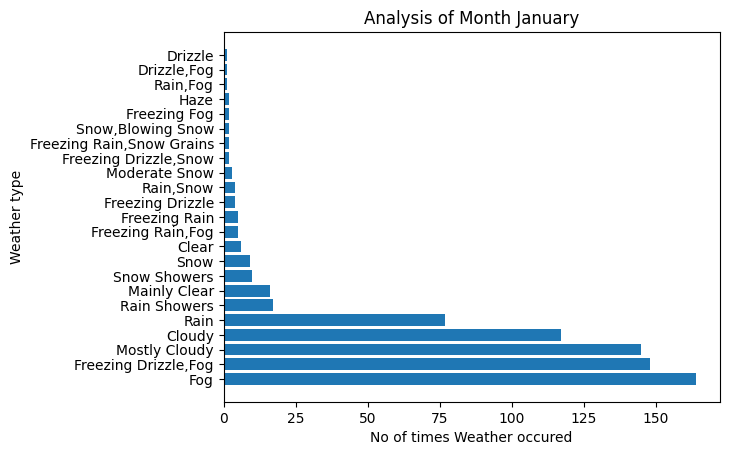

In [6]:
List=list(ndf['Weather'].value_counts())
List_1=ndf['Weather'].unique()
len(List)==len(List_1)
plt.barh(List_1,List)
plt.title('Analysis of Month January')
plt.xlabel('No of times Weather occured')
plt.ylabel('Weather type')
plt.style.use('fivethirtyeight')


Average visiblity during fog and other weather

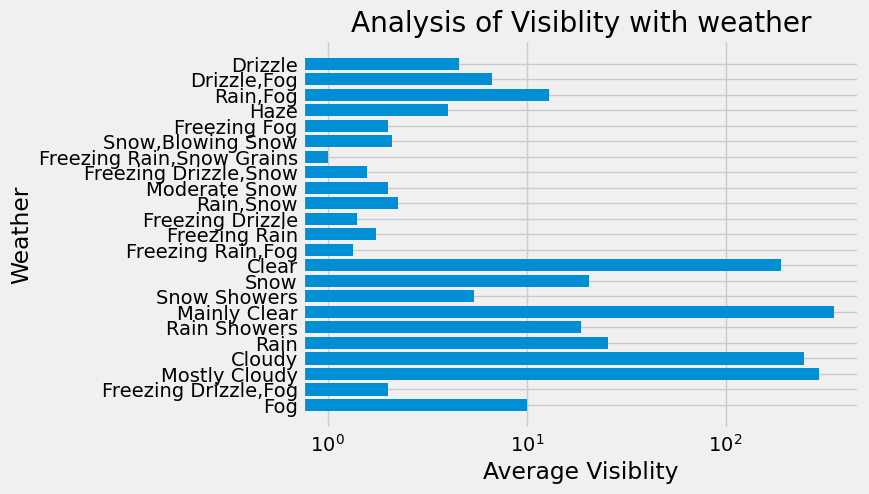

In [7]:
weather=df.groupby(['Weather'])
#weather['Visibility_km'].value_counts().loc['Fog'].mean()
b=[]
for i in List_1:
    a=weather['Visibility_km'].value_counts().loc[i].mean()
    b.append(a)
plt.barh(List_1,b,log=True)
plt.title('Analysis of Visiblity with weather')
plt.xlabel('Average Visiblity')
plt.ylabel('Weather')
plt.style.use('fivethirtyeight')
    
    

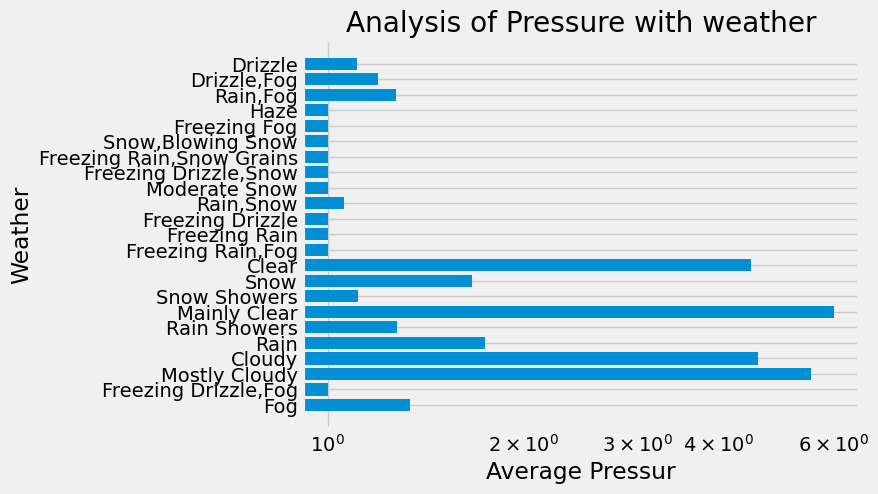

In [8]:
weather=df.groupby(['Weather'])
#weather['Visibility_km'].value_counts().loc['Fog'].mean()
b=[]
for i in List_1:
    a=weather['Press_kPa'].value_counts().loc[i].mean()
    b.append(a)
plt.barh(List_1,b,log=True)
plt.title('Analysis of Pressure with weather')
plt.xlabel('Average Pressur')
plt.ylabel('Weather')
plt.style.use('fivethirtyeight')
    
    

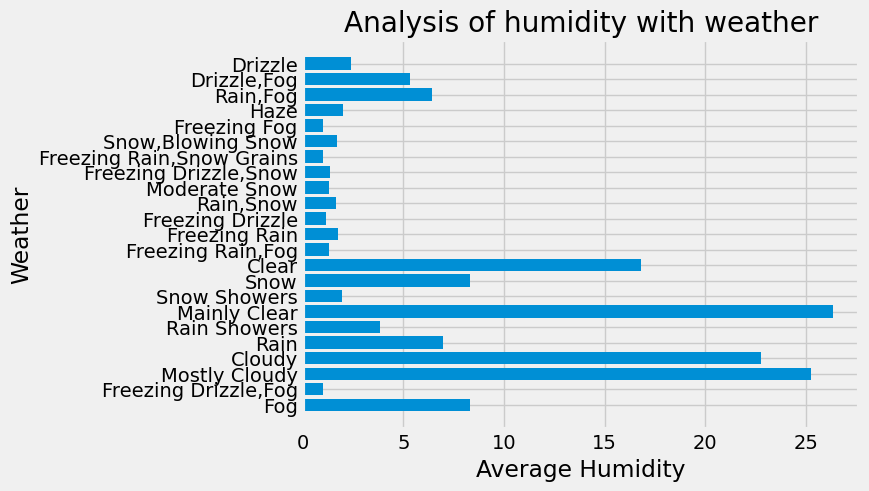

In [9]:
weather=df.groupby(['Weather'])
#weather['Visibility_km'].value_counts().loc['Fog'].mean()
b=[]
for i in List_1:
    a=weather['Rel Hum_%'].value_counts().loc[i].mean()
    b.append(a)
plt.barh(List_1,b,log=False)
plt.title('Analysis of humidity with weather')
plt.xlabel('Average Humidity')
plt.ylabel('Weather')
plt.style.use('fivethirtyeight')
    

In [10]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [11]:
df['Visibility_km'].min()

0.2

#Date and weather when visiblity is lowest

In [12]:
visiblity=df.groupby(['Visibility_km'])
visiblity['Weather'].value_counts().loc[df['Visibility_km'].min()]


Weather
Fog             7
Freezing Fog    1
Name: count, dtype: int64

In [13]:
visiblity=df.groupby(['Visibility_km'])
visiblity['Date/Time'].value_counts().loc[df['Visibility_km'].min()]


Date/Time
2012-03-17 02:00:00    1
2012-03-17 03:00:00    1
2012-03-17 10:00:00    1
2012-03-17 09:00:00    1
2012-03-17 08:00:00    1
2012-03-17 07:00:00    1
2012-03-17 06:00:00    1
2012-03-17 04:00:00    1
Name: count, dtype: int64

#Variation of tempertare in a day

In [14]:
df.head(2)
df['Visiblity']=df['Visibility_km']
df.drop('Visibility_km',axis=1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Press_kPa,Weather,Visiblity
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,101.24,Fog,8.0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,101.24,Fog,8.0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,101.26,"Freezing Drizzle,Fog",4.0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,101.27,"Freezing Drizzle,Fog",4.0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,101.23,Fog,4.8
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,100.13,Snow,9.7
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,100.03,Snow,9.7
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,99.95,Snow,4.8
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,99.91,Snow,9.7


In [15]:
flit=(df['Date/Time']>'2012-1-1') & (df['Date/Time']<'2012-1-2')
a=df[flit]
a

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Visiblity
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,8.0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",4.0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",4.0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4.8
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,6.4
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,6.4
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,8.0
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,8.0
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog,4.0
10,2012-01-01 10:00:00,-1.0,-2.3,91,9,1.2,101.15,Fog,1.2


<Figure size 50000x600 with 0 Axes>

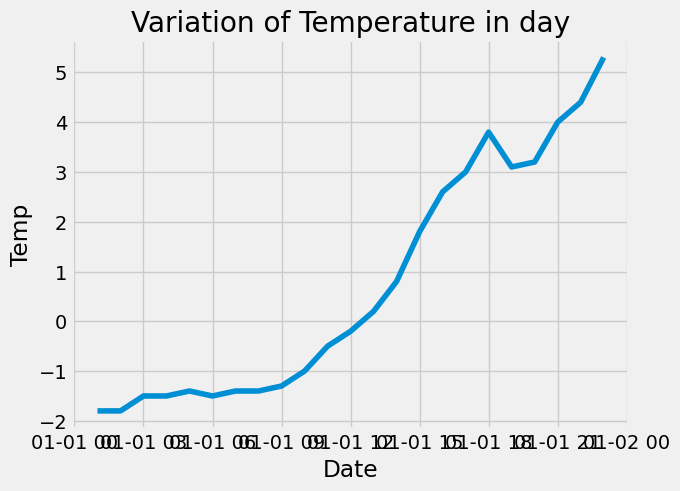

<Figure size 50000x600 with 0 Axes>

In [16]:
plt.plot(a['Date/Time'],a['Temp_C'])
plt.title('Variation of Temperature in day')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(500,6))

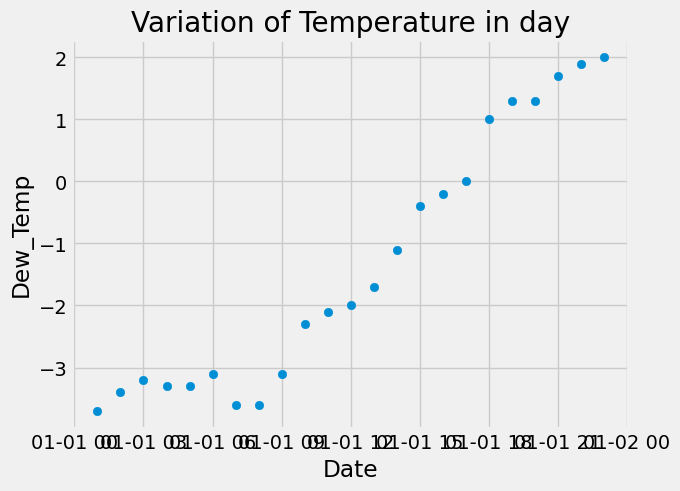

<Figure size 60000x600 with 0 Axes>

In [17]:
plt.scatter(a['Date/Time'],a['Dew Point Temp_C'])
plt.title('Variation of Temperature in day')
plt.xlabel('Date')
plt.ylabel('Dew_Temp')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(600,6))
plt.tight_layout()

# Multiple regression

# y=b+b1x1+b2x2.......bnxn

# Asssumptions we will not apply on
1)Linearity
2)Homoscedasticity(no Cone like data plots are allowed )
3)Multivaraite Normality (both side of side are different structures)
4)Independance(pattern type structures are there)
5)Lack of Multicollinearity thery are not correalated
6)The Outlier Check(we should remove Outlier)

# Visbility will be depended on Temp,Pressue,Wind speed,Rel humidity,Weather

# we cannot directly add weather into consideration hence we need to build dummy varaible

# replace snow to 0
replace fog to 1

In [18]:
len(df['Weather'].unique())

50

# Building A model

In [19]:
#we need to convert fog snow into other for data preprocessing
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Visiblity
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,8.0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,8.0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",4.0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",4.0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4.8
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,9.7
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,9.7
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,4.8
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,9.7


In [26]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rel Hum_%        8784 non-null   float64
 1   Wind Speed_km/h  8784 non-null   float64
 2   Press_kPa        8784 non-null   float64
 3   Weather          8784 non-null   object 
 4   Visiblity        8784 non-null   float64
dtypes: float64(4), object(1)
memory usage: 343.3+ KB


In [60]:
fd=pd.read_csv('50_Startsup.csv')

In [61]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [63]:

x=fd.iloc[:,:-1].values#it selects all column expect last column i.e is Visiblity
y=fd.iloc[:,-1].values#it selects last column 
x.shape

(50, 4)

# Encoding the catogerial data i.e Weather into some number

In [64]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x.shape
x=np.array(ct.fit_transform(x))

In [65]:
x.shape

(50, 6)

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [82]:
#We cannot make 5dimensional graph to represent graph hence we use vector of real profit vs prdict profit of representation
#y_pred vs y_test

# Prdicting test set

In [83]:
y_pred=regressor.predict(x_test)
y_pred
#as test size is 0.2 we get 20%50 elements i.e 10

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [84]:
np.set_printoptions(precision=2)
#we use concat to concat real profits and predicted profits
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1))))#reshape vector into vertical column

[[103015.2 ]
 [132582.28]
 [132447.74]
 [ 71976.1 ]
 [178537.48]
 [116161.24]
 [ 67851.69]
 [ 98791.73]
 [113969.44]
 [167921.07]
 [103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]
